In [1]:
# import libraries

import pandas as pd
import numpy as np
import requests

In [2]:
# pull hdb resale transactions from data.gov.sg
url = 'https://data.gov.sg/api/action/datastore_search?resource_id=f1765b54-a209-4718-8d38-a39237f502b3'
response = requests.get(url)
data = response.json()

In [3]:
# search params
search_params = {'limit': 0}
# get total number of records from website
total_records = data['result']['total']
search_params['limit'] = total_records
# retrieve all records from url
response = requests.get(url, params=search_params)
data = response.json()

In [4]:
# convert data to dataframe
df = pd.DataFrame(data['result']['records'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154753 entries, 0 to 154752
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   town                 154753 non-null  object
 1   flat_type            154753 non-null  object
 2   flat_model           154753 non-null  object
 3   floor_area_sqm       154753 non-null  object
 4   street_name          154753 non-null  object
 5   resale_price         154753 non-null  object
 6   month                154753 non-null  object
 7   remaining_lease      154753 non-null  object
 8   lease_commence_date  154753 non-null  object
 9   storey_range         154753 non-null  object
 10  _id                  154753 non-null  int64 
 11  block                154753 non-null  object
dtypes: int64(1), object(11)
memory usage: 14.2+ MB


In [6]:
df.head()

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,remaining_lease,lease_commence_date,storey_range,_id,block
0,ANG MO KIO,2 ROOM,Improved,44,ANG MO KIO AVE 10,232000,2017-01,61 years 04 months,1979,10 TO 12,1,406
1,ANG MO KIO,3 ROOM,New Generation,67,ANG MO KIO AVE 4,250000,2017-01,60 years 07 months,1978,01 TO 03,2,108
2,ANG MO KIO,3 ROOM,New Generation,67,ANG MO KIO AVE 5,262000,2017-01,62 years 05 months,1980,01 TO 03,3,602
3,ANG MO KIO,3 ROOM,New Generation,68,ANG MO KIO AVE 10,265000,2017-01,62 years 01 month,1980,04 TO 06,4,465
4,ANG MO KIO,3 ROOM,New Generation,67,ANG MO KIO AVE 5,265000,2017-01,62 years 05 months,1980,01 TO 03,5,601


In [8]:
## convert resale_price to integer
df['resale_price'] = df['resale_price'].astype('float')

In [9]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT MERAH', 'BUKIT BATOK',
       'CENTRAL AREA', 'BUKIT PANJANG', 'GEYLANG', 'BUKIT TIMAH',
       'CHOA CHU KANG', 'CLEMENTI', 'PUNGGOL', 'HOUGANG', 'QUEENSTOWN',
       'JURONG EAST', 'JURONG WEST', 'KALLANG/WHAMPOA', 'MARINE PARADE',
       'PASIR RIS', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [10]:
# convert month column to datetime
df['sale_period'] = pd.to_datetime(df['month'])

# split remaining_lease into years and months
df['remaining_lease_years'] = df['remaining_lease'].str[:2]
df['remaining_lease_months'] = df['remaining_lease'].str[9:11]


In [11]:
# # reshuffle columns
df = df[['town',
         'flat_type', 
         'flat_model', 
         'floor_area_sqm',
         'block',
         'street_name',
         'resale_price',
         'sale_period',
         'remaining_lease_years',
         'remaining_lease_months',
         'storey_range']]

In [17]:
# filter year column from 2017 onwards
df_filtered = df[df['sale_period'].dt.year >= 2017]

# filter out selected flat_models
flat_filters = ['EXECUTIVE']
town_filters = ['PUNGGOL','SENGKANG']
# street_filters = ['PUNGGOL CTRL']
df_filtered = df_filtered[df_filtered['flat_type'].isin(flat_filters) & df_filtered['town'].isin(town_filters)]


In [18]:
# sort by resale_price in descending order
df_filtered.sort_values(by='resale_price', ascending=False, inplace=True)

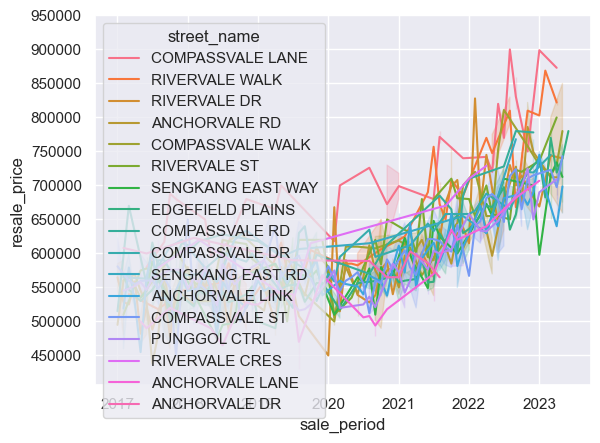

In [19]:
# plot resale_price vs sale_period with street_name as hue
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# plot resale_price vs sale_period with street_name as hue  
sns.lineplot(x='sale_period', y='resale_price', hue='street_name', data=df_filtered)
plt.yticks(np.arange(450000,1000000,50000))
plt.show()


